In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# 範例
- 了解如何在Keras中加入regularization
- 熟悉建立，訓練模型
- 將訓練結果視覺化並比較結果

In [5]:
from keras.regularizers import l1, l2, l1_l2

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l2(l2_ratio))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [13]:
results = {}

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0725 12:53:29.440215 12332 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0725 12:53:29.604651 12332 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 158us/step - loss: 15.0813 - acc: 0.2689 - val_loss: 13.9445 - val_acc: 0.3371
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 13.0140 - acc: 0.3578 - val_loss: 12.1236 - val_acc: 0.3696
Epoch 3/50
50000/50000 [==============================] - 5s 90us/step - loss: 11.3437 - acc: 0.3805 - val_loss: 10.5919 - val_acc: 0.3909
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 9.9319 - acc: 0.3963 - val_loss: 9.2921 - val_acc: 0.4045
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 8.7303 - acc: 0.4065 - val_loss: 8.1926 - val_acc: 0.4073
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 7.7061 - acc: 0.4143 - val_loss: 7.2458 - val_acc: 0.4161
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 6.8337 - acc: 0.4240 - val_loss: 6.4403 

Epoch 2/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9623 - acc: 0.3572 - val_loss: 1.9151 - val_acc: 0.3771
Epoch 3/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.8764 - acc: 0.3882 - val_loss: 1.8404 - val_acc: 0.4032
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8157 - acc: 0.4108 - val_loss: 1.7900 - val_acc: 0.4185
Epoch 5/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7679 - acc: 0.4295 - val_loss: 1.7626 - val_acc: 0.4314
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7259 - acc: 0.4434 - val_loss: 1.7251 - val_acc: 0.4382
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6897 - acc: 0.4560 - val_loss: 1.6920 - val_acc: 0.4468
Epoch 8/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6583 - acc: 0.4676 - val_loss: 1.6799 - val_acc: 0.4557
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 6s 119us/step - loss: 1.6571 - acc: 0.4186 - val_loss: 1.6472 - val_acc: 0.4247
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6110 - acc: 0.4363 - val_loss: 1.6031 - val_acc: 0.4391
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5732 - acc: 0.4483 - val_loss: 1.5697 - val_acc: 0.4423
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5378 - acc: 0.4613 - val_loss: 1.5519 - val_acc: 0.4468
Epoch 8/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5094 - acc: 0.4702 - val_loss: 1.5178 - val_acc: 0.4627
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4804 - acc: 0.4800 - val_loss: 1.5001 - val_acc: 0.4695
Epoch 10/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4551 - acc: 0.4884 - val_loss: 1.4860 - val_acc: 0.4715
Epoch 11/50
50000/50000 [===================

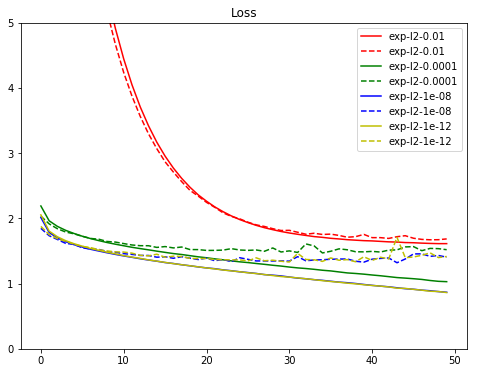

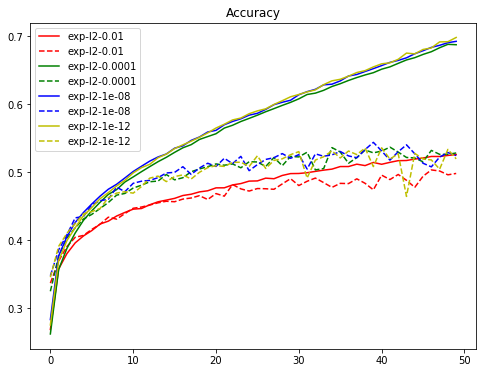

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Homework
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

## L1

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [17]:
results = {}

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 93us/step - loss: 6.0162 - acc: 0.2712 - val_loss: 5.8213 - val_acc: 0.3395
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 5.7263 - acc: 0.3651 - val_loss: 5.6518 - val_acc: 0.3679
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 5.5778 - acc: 0.3940 - val_loss: 5.5131 - val_acc: 0.3995
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 5.4554 - acc: 0.4158 - val_loss: 5.4139 - val_acc: 0.4112
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 5.3474 - acc: 0.4296 - val_loss: 5.2986 - val_acc: 0.4335
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 5.2451 - acc: 0.4427 - val_loss: 5.2153 - val_acc: 0.4334
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 5.1521 - acc: 0.4540 - val_loss: 5.1228 - val_acc

50000/50000 [==============================] - 4s 84us/step - loss: 1.7050 - acc: 0.3981 - val_loss: 1.6727 - val_acc: 0.4145
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6477 - acc: 0.4177 - val_loss: 1.6301 - val_acc: 0.4307
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6027 - acc: 0.4354 - val_loss: 1.5952 - val_acc: 0.4372
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5654 - acc: 0.4478 - val_loss: 1.5583 - val_acc: 0.4465
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5301 - acc: 0.4603 - val_loss: 1.5448 - val_acc: 0.4504
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4992 - acc: 0.4714 - val_loss: 1.5184 - val_acc: 0.4627
Epoch 9/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4714 - acc: 0.4799 - val_loss: 1.4872 - val_acc: 0.4729
Epoch 10/50
50000/50000 [===========================

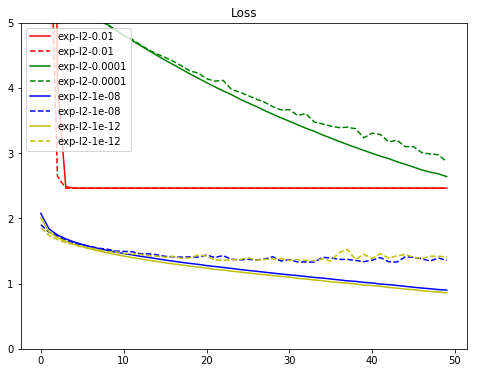

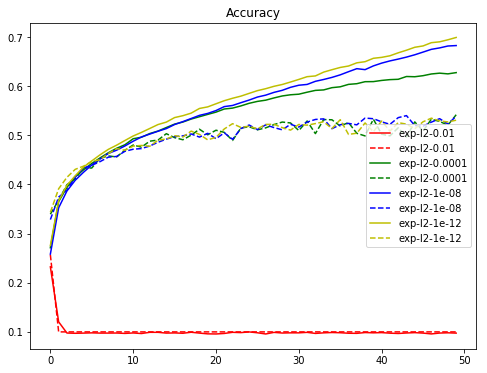

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## l1_l2

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio, l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1_l2_ratio))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [10]:
results = {}

for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0725 22:00:35.523308  1972 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0725 22:00:35.524297  1972 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 22:00:35.544136  1972 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 22:00:35.545130  1972 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0725 22:00:35.832572  1972 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 197.7231 - acc: 0.2333 - val_loss: 35.9970 - val_acc: 0.2634
Epoch 2/50
50000/50000 [==============================] - 5s 101us/step - loss: 15.9493 - acc: 0.1097 - val_loss: 5.1787 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 3.2320 - acc: 0.1000 - val_loss: 2.4719 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.4632 - acc: 0.0988 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.4624 - acc: 0.0991 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.4624 - acc: 0.0981 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.4624 - acc: 0.0970 - val_loss: 2.4622 - v

50000/50000 [==============================] - 5s 96us/step - loss: 9.8075 - acc: 0.3573 - val_loss: 9.3702 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 5s 98us/step - loss: 8.9946 - acc: 0.3819 - val_loss: 8.6245 - val_acc: 0.3948
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 8.3065 - acc: 0.3976 - val_loss: 7.9897 - val_acc: 0.4093
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 7.7160 - acc: 0.4089 - val_loss: 7.4494 - val_acc: 0.4109
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 7.2050 - acc: 0.4146 - val_loss: 6.9701 - val_acc: 0.4239
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 6.7618 - acc: 0.4228 - val_loss: 6.5704 - val_acc: 0.4167
Epoch 8/50
50000/50000 [==============================] - 5s 102us/step - loss: 6.3734 - acc: 0.4297 - val_loss: 6.1987 - val_acc: 0.4327
Epoch 9/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 98us/step - loss: 5.2999 - acc: 0.3827 - val_loss: 5.0155 - val_acc: 0.3939
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 4.7552 - acc: 0.4003 - val_loss: 4.5096 - val_acc: 0.4029
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 4.2942 - acc: 0.4127 - val_loss: 4.0938 - val_acc: 0.4124
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 3.9040 - acc: 0.4211 - val_loss: 3.7266 - val_acc: 0.4236
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 3.5691 - acc: 0.4306 - val_loss: 3.4295 - val_acc: 0.4287
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 3.2833 - acc: 0.4367 - val_loss: 3.1622 - val_acc: 0.4323
Epoch 9/50
50000/50000 [==============================] - 5s 98us/step - loss: 3.0394 - acc: 0.4434 - val_loss: 2.9341 - val_acc: 0.4400
Epoch 10/50
50000/50000 [=======================

50000/50000 [==============================] - 5s 100us/step - loss: 4.7652 - acc: 0.4006 - val_loss: 4.5201 - val_acc: 0.4070
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 4.3036 - acc: 0.4099 - val_loss: 4.0968 - val_acc: 0.4125
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 3.9111 - acc: 0.4199 - val_loss: 3.7413 - val_acc: 0.4192
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 3.5768 - acc: 0.4272 - val_loss: 3.4248 - val_acc: 0.4327
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 3.2894 - acc: 0.4342 - val_loss: 3.1611 - val_acc: 0.4377
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 3.0436 - acc: 0.4395 - val_loss: 2.9389 - val_acc: 0.4391
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.8328 - acc: 0.4464 - val_loss: 2.7471 - val_acc: 0.4495
Epoch 11/50
50000/50000 [===================

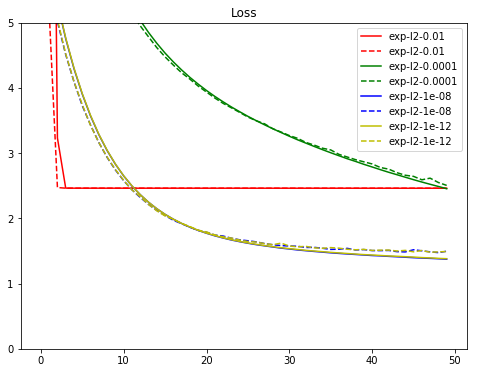

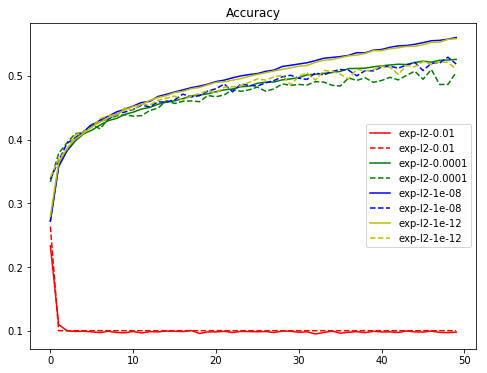

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()